**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |


In [5]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

**Answer:

While running the default agent code, a few observations i have taken into consideration would be that...

    0. The agent state does not get updated.
    1. The agent has not been given the parameters to learn.
    2. The agent properly idled at a red lights many times with positive gain in reward (rewarded 1.25),(rewarded 1.77).
    3. The agent idled at a green light with no oncoming traffic causing a negative loss in reward (rewarded -4.46).
    4. Simulation ended
    5. Simulated new trial, took different starting actions.
    6. The agent takes 24 steps each trial for 10 test and 20 trials


**

**Answer:

Agent: In the agent.py file, three flags that can be set to change simulation would be the...

        1. To set a learning agent so that the agent knows that it is expected to learn given the environment so that the trials and test can update and have the agent "explore" its 'Q,s,a'.
        2. The (simulator= n_test =nt...) changes the simulation with the number of trials increasing or decreasing given which decay function is used  
        3. Set the alpha/epsilon learning rate, to check through all actions, choosing random action which will explore the whole space and learn the True Q.. assuming the epsilon is small.. ( a drawback is that in some cases it doesn't use what it has learned where epsilon never decayse and does not explore). epsilon>


 "Initialize Q-learning so that the state gets updated givent the agents actions each(state, action) timestamp, that Q-hat says to take ."

Environment:
    
       1. The Environment class function called when agent performs an action  is def_act(self, agent, action).To check if the agents current state, then determines the most legal action to take and supplying an accuarate reward based on the action. Updating with each state to action
    



simulator:
       
       1. render_text = This is the non-GUI render display of the simulation. Simulated trial data will be rendered in the terminal/command prompt.
       --Contains the simulation whether the agent properly idles at red lights, drives through green lights properly, avoids oncoming traffic...
       2.render() = This is the GUI render display of the simulation. 
       --Displays the visualisation of self driving car with pyGame
        


planner:
       
       1. In the planner.py file , the next_waypoint function would consider the East-West directions first if dx,dy-=0.


**

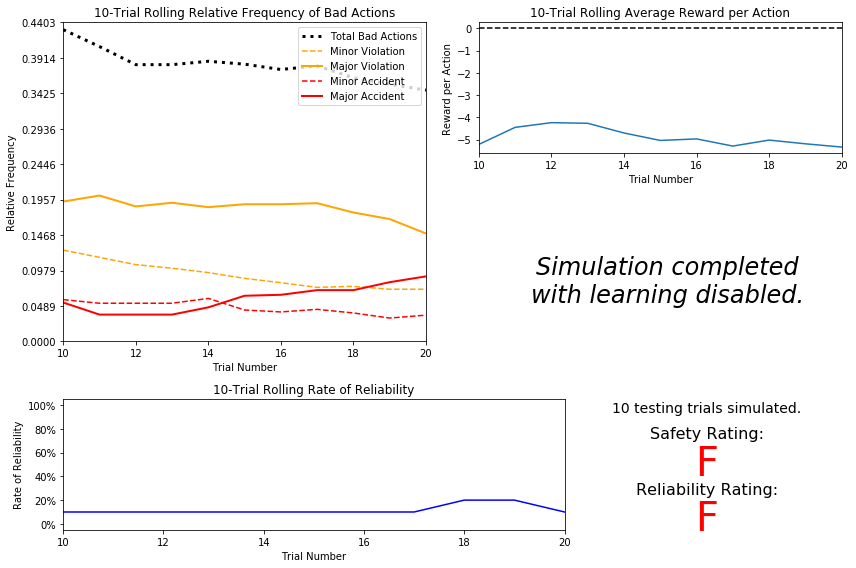

In [6]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

**Answer:


THE VISUALISATION ABOVE HAS THREE DIFFERENT GRAPHS DISPLAYING THE RELATIVE FREQUENCY OF BAD ACTIONS, ROLLING AVERAGE REWARDS PERACTION, AND RELIABILITY.

THE GRAPH DISPLAYING RELATIVE FREQUENCY OF BAD ACTIONS, SHOWS MINOR-MAJOR ACCIDENTS BASED ON THE BAD ACTIONS, WITH EACH TRIAL NUMBER.THE AGENT IS MAKING MANY BAD DECISIONS BUT AROUND THE MIDDLE OF THE TRAINING THE AGENT FLUCTUATES BETWEEN THE GOOD-BAD DECSIONS. WHILE NEAR THE END OF THE TRIALS THE AGENT STARTED MAKING MORE STEADY DECISIONS.. THE NUMBER OF BAD ACTIONS TO DECREASE IS RELEVANT AND THIS STILL MAKES THE SMARTCAB UNSAFE.

THE RATE OF RELIABILITY DOES MAKE SENSE GIVEN THAT THE AGENT IS DRIVING RANDOMLY. IT IS IN A RANDOM STATE AND HAS A STEADY RELIABLITY OF ABOUT %15,REACHES 20% RELIABILTY ANDSTARTS TO REDUCE BACK TO 15%.

BECAUSE THE AGENT IS NOT LEARNING , THE REWARDS ARE RANGING FROM HIGH TO LOW. CONSIDERING THE RATE OF BAD ACTIONS IS RATHER HIGH IT IS SAFE TO ASSUME THAT THIS IS THE REASON THE SMARTCAB GET HEAVILY PENALIZED.

AS THE NUMBER OF TRIALS INCREASE, GIVEN THE PARAMETERS, IT DOES NOT MATTER THE TRIAL NUMBER. IN THE MIDDLE OF THE TRIALS THE AGENT STARTED TO FLUCTUATE BETWEEN BAD-GOOD ACTIONS. NEAR  THE  END OF THE SIMULATION, THE AGENT STARTED MAKING STEADY DECISIONS BUT STILL NOT DECREASING IN BAD ACTIONS.

WITH THE DATA GIVEN FROM THE TRIALS . THIS SMARTCAB IS NOT CONSIDERED SAFE AT THE MOMENT. NO MATTER THE TRIAL THE AGENT NEVER REACHES 0% FOR RELATIVE BAD ACTIONS. THE RATE OF RELIABILITY IS UNDER 40% MORE THAN HALF THE TIME SO THE SMARTCAB COMMITS MANY VIOLATIONS. THEREFORE 'GAINING' NEGATIVE REWARD AND CAUSING THE SMARTCAB TO FAIL.  

INCREASING NUMBER OF TRIALS CAN BE BENEFICIAL POSSIBLY??



**

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

**Answer:

THE MOST RELEVANT FEATURES FOR SAFETY AND EEFICIENCY WOULD BE THE {LEFT,RIGHT,ONCOMING,LIGHT} INPUT FEATURES FOR THE BUILD STATE. THESE FEATURES HAVE RELEVANCE BECAUSE IT WILL HELP THE AGENT DETERMINE THAT GIVEN ITS CURRENT STATE IF IT CAN MAKE THE APPRORIATE DECISION WHILE NOT CAUSING ANY ACCIDENTS OR VIOLATIONS WHILE STILL MEETING THE REQUIRED DEADLINE AND NOT HAVE TO ADD THE DEADLINE INPUT IN. IN CERTAIN AREAS WE CAN DISREGARD RIGHT BECAUSE IT IS SAFE TO TURN RIGHT ON RED IN MOST CASES. DEADLINE IS ALSO NOT RELEVANT BECAUSE THE AGENT WILL LEARN FROM ITS LOW REWARD AND BUILDS ON IT AS THE TRIALS INCREASE AND THE TRAINING OPTIMIZES, IMPROVING ITS RELIABILITY.

**

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

**Answer:

GIVEN THAT FOUR FEATURES HAVE BEEN USED, LIGHT(2INPUT), WAYPOINT(3INPUTS) AND FEATURES (WAYPOINT,LEFT,ONCOMING) MAKING A STATE SPACE OF 96 COMBINATIONS -> 2 X 3 X 4 X 4. NOT MAKING A POLICY TO COMPLICATED FOR AN AGENT TO LEARN WITH THE GIVEN TRIALS.

**

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

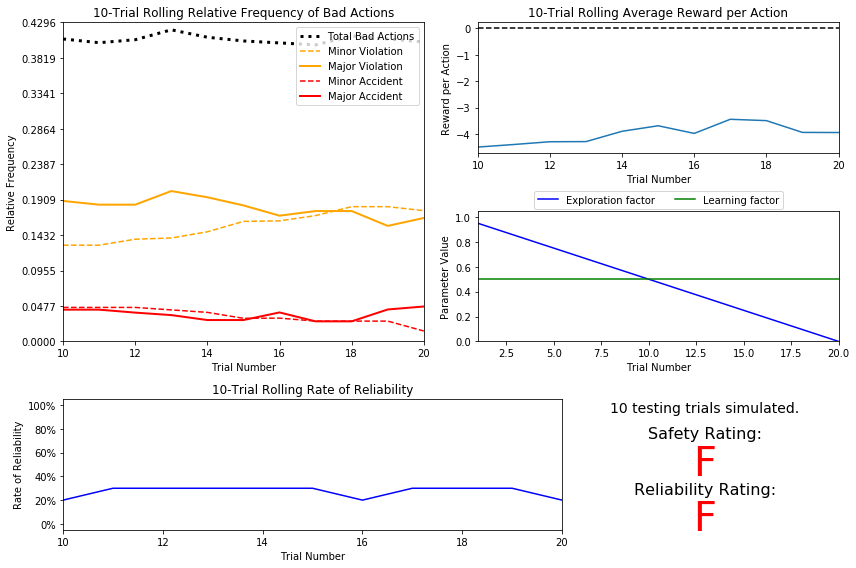

In [4]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

**Answer:

COMPARED TO THE OBSERVATIONS WITH THE BASIC DRIVING AGENT AND THE DEFAULT LEARNING AGENT, SUCH AS HIGH RATES OF MAJOR VIOLATIONS AND THE GRADES.

THE AGENT REQUIRED 20 TRIALS BEFORE TESTING ,the epsilon was decreasing by 0.05 (0.05 X 20 = 1) WITH EACH TRIAL.WHEN EPSILON REACHED 0 REASONABLY,IT WILL BEGIN TESTING.

THE DECAY FUNCTION  self.trial = 0 -.05 HAS BEEN PROPERLY IMPLENTED IN THE PARAMTERS PANEL .IT STEADILY DECREASED ACROSS ALL 20 TRIALS
 
AS THE NUMBER OF TRAINING TRIALS INCREASED , THE NUMBER OF BAD ACTIONS INCREASED TO AROUND >38% AND <45%, AND THE SCORE OF REWARDS WERE INCREASING COMPARED TO THE NON-LEARNER

THE AGENT HAS NOT IMPROVED MUCH .


**

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
Use a decaying function for $\alpha$ (the learning rate). If so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.


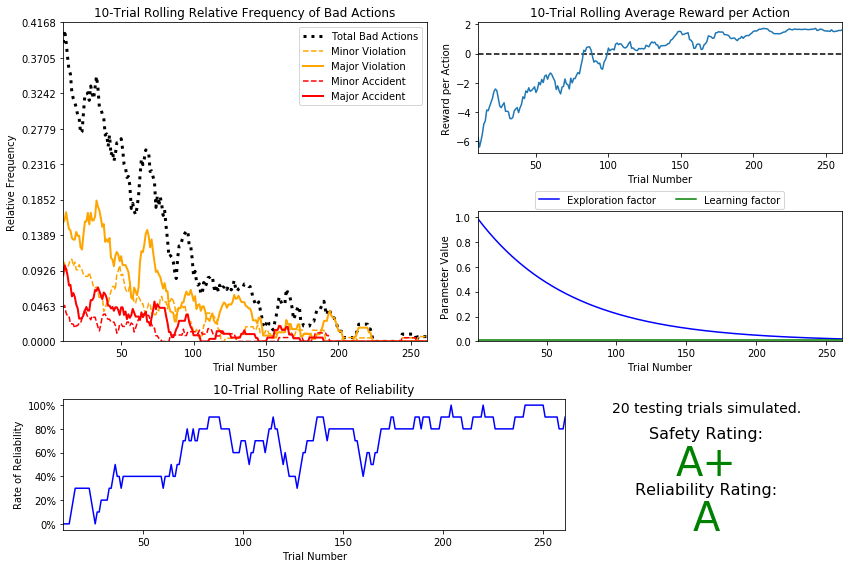

In [6]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

**Answer:

 THE EXPLORATION FACTOR USED IS NON-LINEAR DECAY FUNCTION: (ϵ=e^−at) WHERE EXPLORATION = EPSILON TO THE POWER OF THE -ALHPA(TRIAL). OVER ALL OF THE 260 TRAINING TRIALS THE RATE OF DECAY RESPONSIBLY LOWERED TO A VALUE OF .02 BEFORE IT BEGAN TESTING.
 THE RATES USED FOR EPSILON,TOLERANCE, AND ALPHA WERE THE DEFAULT EPSILON OF 1.0 DURING THE NON TESTING WHICH DECAYED TO .02, WITH A TOLERANCE OF .02 AND AN ALPHA OF .15. I USED THESE VALUES SO THAT THE ALPHA WAS SMALL AND THE AGENT COULD HAVE MORE EXPLORATION AND USE WHAT IT HAS LEARNED INSTEAD OF GIVING THE AGENT PARAMETERS TO LEARN AND LEARN FROM ITS REWARDS.
 
 A SIGNIFICANT IMPROVEMENT WAS MADE TO THE AGENT COMPARED TO THE DEFAULT LEARNING AGENT. FOR THE DEFAULT LEARNING AGENT, THE RATE OF RELIABILITY WAS AT A STEADY 0% BUT RECEIVED A B FOR SAFETY. MEANING THAT THE CAB WAS SAFE BUT NOT MAKING IT TO THE DESTINATIONS BY THE DEADLINE. AS FOR THE IMPROVED LEARNING AGENT, THE AGENT BEGAN TO LEARN MORE FROM ITS REWARDS AND MAKE MORE APPRPRIATE ACTIONS AS THE TRIALS INCREASED 

THE HIGH RATING IN THE SMARTCAB'S PERFORMANCE SHOWS THAT THE Q-LEARNER  HAS SUCCESFULLY LEARNED THE OPTIMAL POLICY.

GIVEN THE RATINGS , THE MODEL SEEMS TO BE SATISFACTORY FOR RIDING ON AMERICAN ROADS AND COMMIT LEGAL ACTIONS BASED ON THE VARIOUS ENVIRONMENT FOR THIS SIMULATION.. MAYBE NOT NECESSARILY FOR A REAL WORLD ENVIRONMNET SAY THE ROCKY MOUNTAINS BECAUSE MOUNTAINS HAVE MORE OBSTACLES SUCH AS STEEP ROCKY GRADES. FOR THIS SIMULATION I AM SATISFIED WITH THESE RATINGS


**

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

**Answer:


THERE ARE DEFINITELY STATES WHER THE POLICY IS DIFFERENT THAN EXPECTED IN CERTAIN STATES OF THE TESTS, MOSTLY THE BEGINNING... 

IN THE US, TRAFFIC LAWS CONSIST OF THE FOLLOWING, etc.... THAT COULD REPRESENT AN OPTIMAL POLICY.:

IF NO ONCOMING TRAFFIC AND LIGHT IS GREEN FOLLOW WAYPOINT
IF ONCOMING TRAFFIC CHOOSE NONE- WAIT FOR TRAFFIC
IF RIGHT TURN ON RED IF LIGHT = GREEN AND ONCOMING TRAFFIC , WAIT FOR TRAFFIC TO PASS CHOOSE NONE
IF LEFT TURN ON GREEN FOLLOW WAYPOINT.
IF AGENT WANTS TO GO LEFT, MUST YIELD TO ONCOMING TRAFFIC GOING FORWARD OR RIGHT 
IF AGENT WANTS TO TURN RIGHT ON RED,  IF NO ONCOMING TRAFFIC FROM LEFT
IF ONCOMING TRAFFIC AND LIGHT IS RED CHOOSE NONE

OPTIMAL POLICY Q-TABLE
1.('right', 'red', 'right', 'left'):FOLLOWED WAYPOINT RIGHT
 -- forward : -0.14
 -- right : 0.10
 -- None : 0.00
 -- left : -1.19


2.('left', 'green', None, 'left'):FOLLOWED WAYPOINT LEFT
 -- forward : 0.10
 -- right : 0.03
 -- None : -0.36
 -- left : 1.10

3.('forward', 'green', 'left', None):FOLLOWED WAYPOINT FORWARD
 -- forward : 1.49
 -- right : 0.10
 -- None : -0.62
 -- left : 0.14



WHERE THE OPTIMAL POLICY WAS UNEXPECTED..:
('right', 'green', 'forward', 'right'):THE SMARTCAB BELIEVES THE OPTIMAL POLICY WOULD BE TO GO FORWARD OTHER THAN TURNING RIGHT WHICH CAN CAUSE A NEGATIVE REWARD FOR DEADLINE, AND MINOR VIOLATIONS.  POSSIBLY BECAUSE THE AGENT IS LEARNING WHAT THE DIRECTION RIGHT 'IS' CONSIDERING IT WAS VOID FROM THE LEARNING AGENT.
('right', 'green', 'forward', 'right')
 -- forward : 0.08
 -- right : 0.00
 -- None : 0.00
 -- left : 0.00


** 